In [1]:
import os
import cv2
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from PIL import Image
import albumentations as A

from scipy.io import loadmat
import matplotlib.pyplot as plt

# from numpngw import write_png

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [47]:
### source :
src_image_path = '/content/drive/MyDrive/Colab Notebooks/suadd/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/label_images_semantic/'
src_mask_path  = '/content/drive/MyDrive/Colab Notebooks/suadd/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/original_images/'

### destination
image_corrected_path = '/content/drive/MyDrive/Colab Notebooks/suadd/inputs_corrected/'
mask_corrected_path  = '/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/'

In [48]:
imgcorr = [x.split('/')[-1] for x in glob(mask_corrected_path+'*')]
imgorig = [x.split('/')[-1] for x in glob( image_corrected_path+'*')]
[x for x in imgorig  if x not in imgcorr], [x for x in  imgcorr if x not in imgorig ], 

([], [])

In [49]:
len(glob( image_corrected_path+'*'))

8656

## Semantic Drone Dataset

In [6]:
img_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/original_images/*'))
msk_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/label_images_semantic/*'))

In [7]:
len(img_path), len(msk_path)

(400, 400)

In [ ]:
mskcolor_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/Aerial_Semantic_Segmentation_Drone_Dataset/RGB_color_image_masks/RGB_color_image_masks/*'))

In [ ]:
iii = 10

img = cv2.imread(img_path[iii])
msk = cv2.imread(msk_path[iii])
mskc = cv2.imread(mskcolor_path[iii])
mskc = cv2.cvtColor(mskc, cv2.COLOR_BGR2RGB)

img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
msk = cv2.rotate(msk, cv2.ROTATE_90_CLOCKWISE)
mskc = cv2.rotate(mskc, cv2.ROTATE_90_CLOCKWISE)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.resize(img, (1470, 2200), interpolation = cv2.INTER_AREA)
img = np.stack((img,)*3, axis=-1)
msk = cv2.resize(msk, (1470, 2200), interpolation = cv2.INTER_NEAREST)

mskc = cv2.resize(mskc, (1470, 2200), interpolation = cv2.INTER_NEAREST)

In [ ]:
img.shape, msk.shape

((2200, 1470, 3), (2200, 1470, 3))

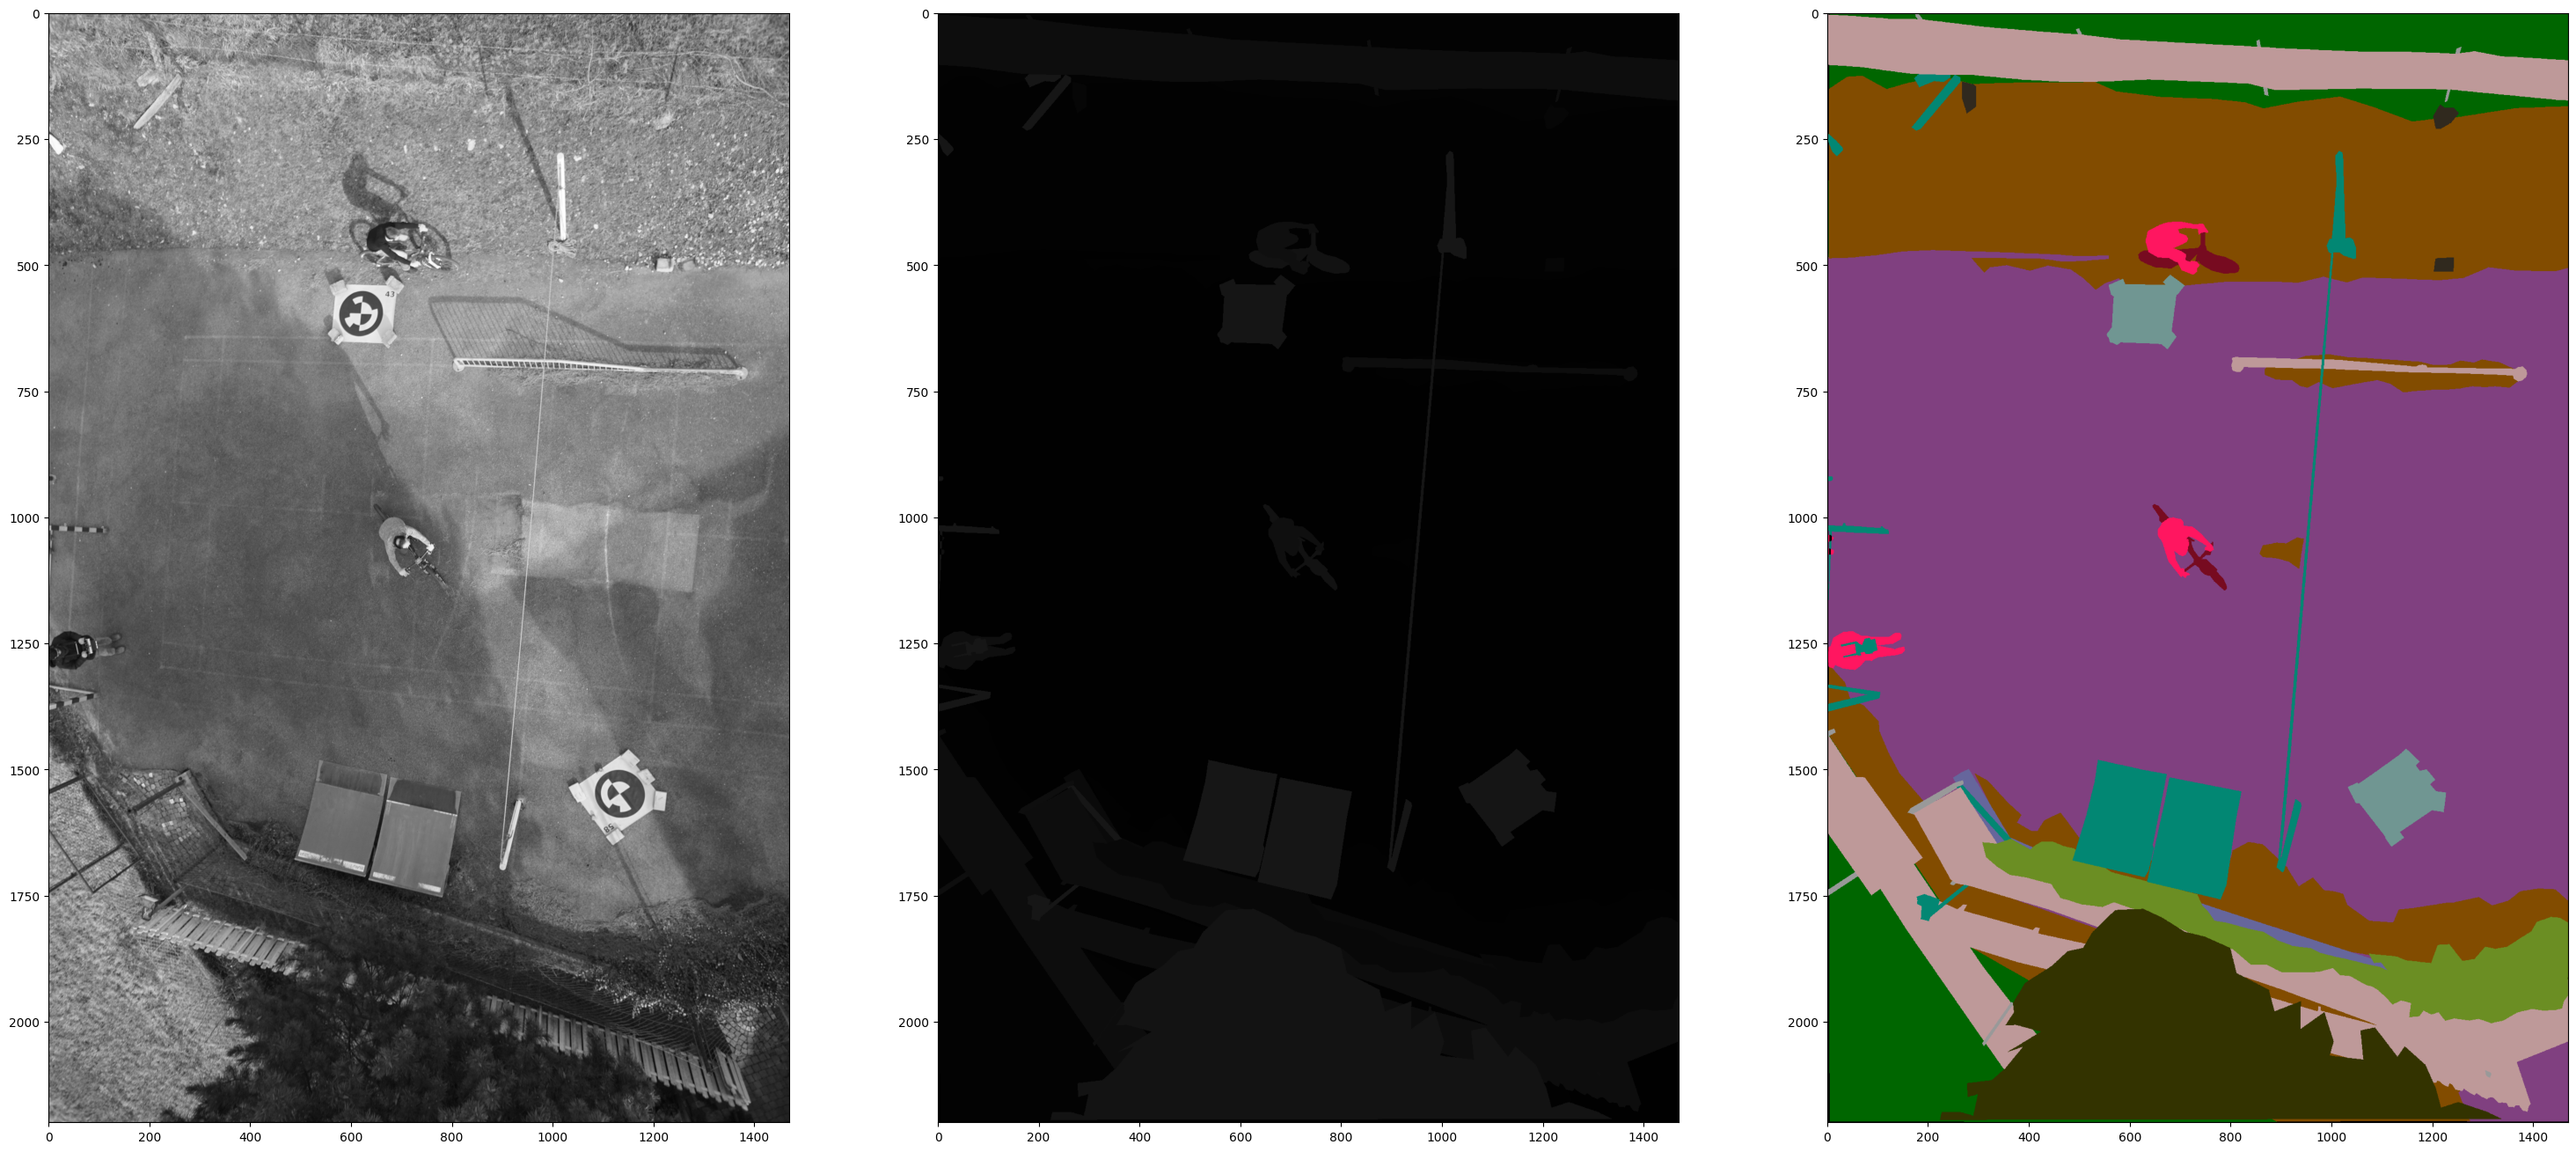

In [ ]:

plt.figure(figsize=(50,50))
# print(np.where(mask==1,1,0).sum())
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(msk)
plt.subplot(1,4,3)
plt.imshow(mskc)

In [ ]:
labels = [
['unlabeled', (0, 0, 0), 255],
['paved-area', (128, 64, 128), 255],
['dirt', (130, 76, 0), 13],
['grass', (0, 102, 0), 2],
['gravel', (112, 103, 87),12],
['water', (28, 42, 168), 0],
['rocks', (48, 41, 30), 12],
['pool', (0, 50, 89), 0],
['vegetation', (107, 142, 35), 5],
['roof', (70, 70, 70), 11],
['wall', (102, 102, 156), 7],
['window', (254, 228, 12), 255],
['door', (254, 148, 12), 255],
['fence', (190, 153, 153), 255],
['fence-pole', (153, 153, 153), 255],
['person', (255, 22, 96), 3],
['dog', (102, 51, 0), 4],
['car', (9, 143, 150), 6],
['bicycle', (119, 11, 32), 255],
['tree', (51, 51, 0), 5],
['bald-tree', (190, 250, 190), 5],
['ar-marker', (112, 150, 146), 255],
['obstacle', (2, 135, 115), 255],
['conflicting', (255, 0, 0), 255],]

In [ ]:
newmask = np.ones(msk.shape)*255
for l in labels:
    # print(l)
    r1, g1, b1 = l[1]
    # print(r1, g1, b1)
    r2, g2, b2 = (l[2],l[2],l[2])

    red, green, blue = mskc[:,:,0], mskc[:,:,1], mskc[:,:,2] 

    calichrome = (red == r1) & (green == g1) & (blue == b1)
    # print(calichrome.sum())
    newmask[:,:,:3][calichrome] = [r2, g2, b2]

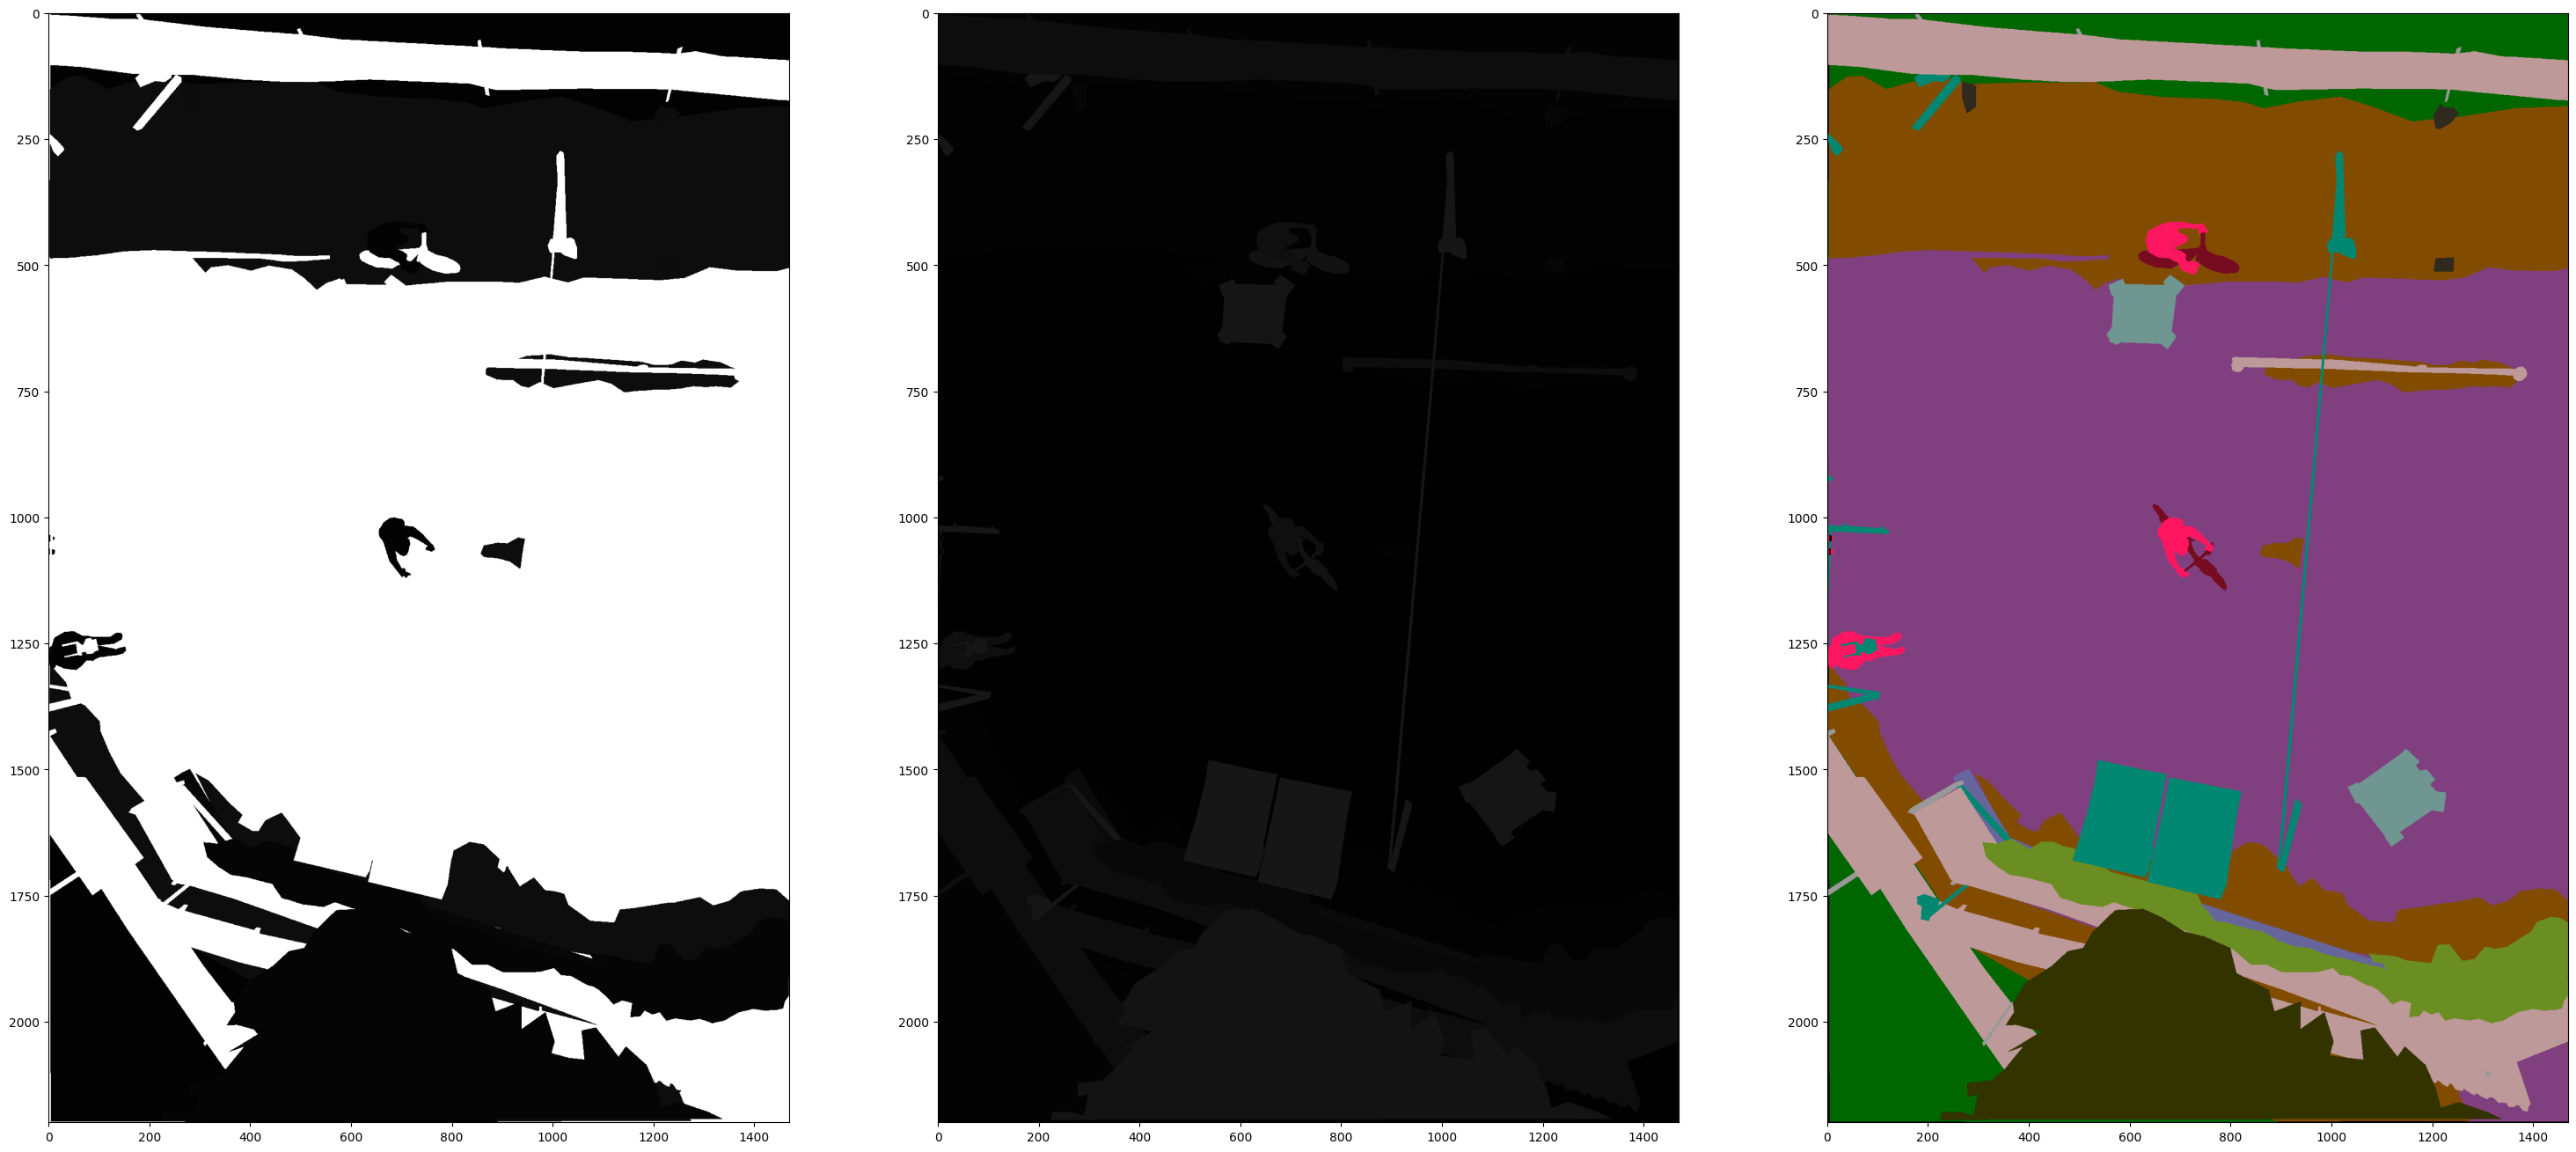

In [ ]:
plt.figure(figsize=(50,50))
# print(np.where(mask==1,1,0).sum())
plt.subplot(1,4,1)
plt.imshow(newmask.astype('uint8'))
plt.subplot(1,4,2)
plt.imshow(msk)
plt.subplot(1,4,3)
plt.imshow(mskc)

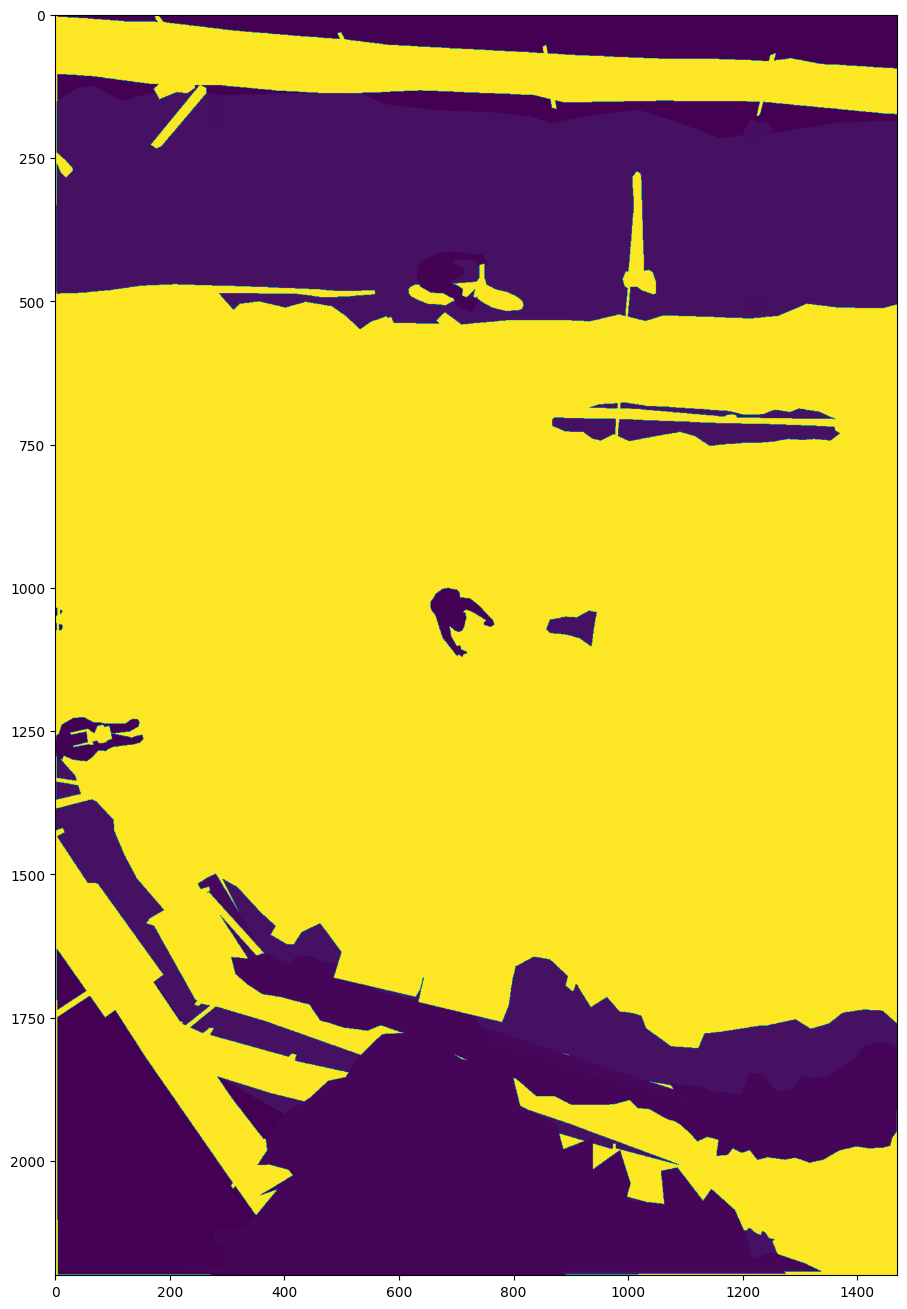

In [ ]:
plt.figure(figsize=(50,50))
plt.subplot(1,4,1)
plt.imshow(newmask.astype('uint8')[:,:,0])

In [ ]:
for img_p, msk_p in zip(img_path, mskcolor_path):

  img = cv2.imread(img_p)
  mskc = cv2.imread(msk_p)
  mskc = cv2.cvtColor(mskc, cv2.COLOR_BGR2RGB)

  img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
  mskc = cv2.rotate(mskc, cv2.ROTATE_90_CLOCKWISE)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, (1470, 2200), interpolation = cv2.INTER_AREA)
  img = np.stack((img,)*3, axis=-1)

  mskc = cv2.resize(mskc, (1470, 2200), interpolation = cv2.INTER_NEAREST)


  newmask = np.ones(msk.shape)*255
  for l in labels:
#             print(l)
      r1, g1, b1 = l[1]
      r2, g2, b2 = (l[2],l[2],l[2])

      red, green, blue = mskc[:,:,0], mskc[:,:,1], mskc[:,:,2] 

      calichrome = (red == r1) & (green == g1) & (blue == b1)
      newmask[:,:,:3][calichrome] = [r2, g2, b2]


  imgbw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_1.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_1.png', newmask.astype('uint8')[:,:,0])

  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_2.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_2.png', newmask.astype('uint8')[:,:,0])

  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_3.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_3.png', newmask.astype('uint8')[:,:,0])

  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_4.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_4.png', newmask.astype('uint8')[:,:,0])

  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_5.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_aug__adddata_5.png', newmask.astype('uint8')[:,:,0])

 

In [ ]:
img_p.split('/')[-1].split('.')[0]+'_aug__adddata_1.png'

'598_aug__adddata_1.png'

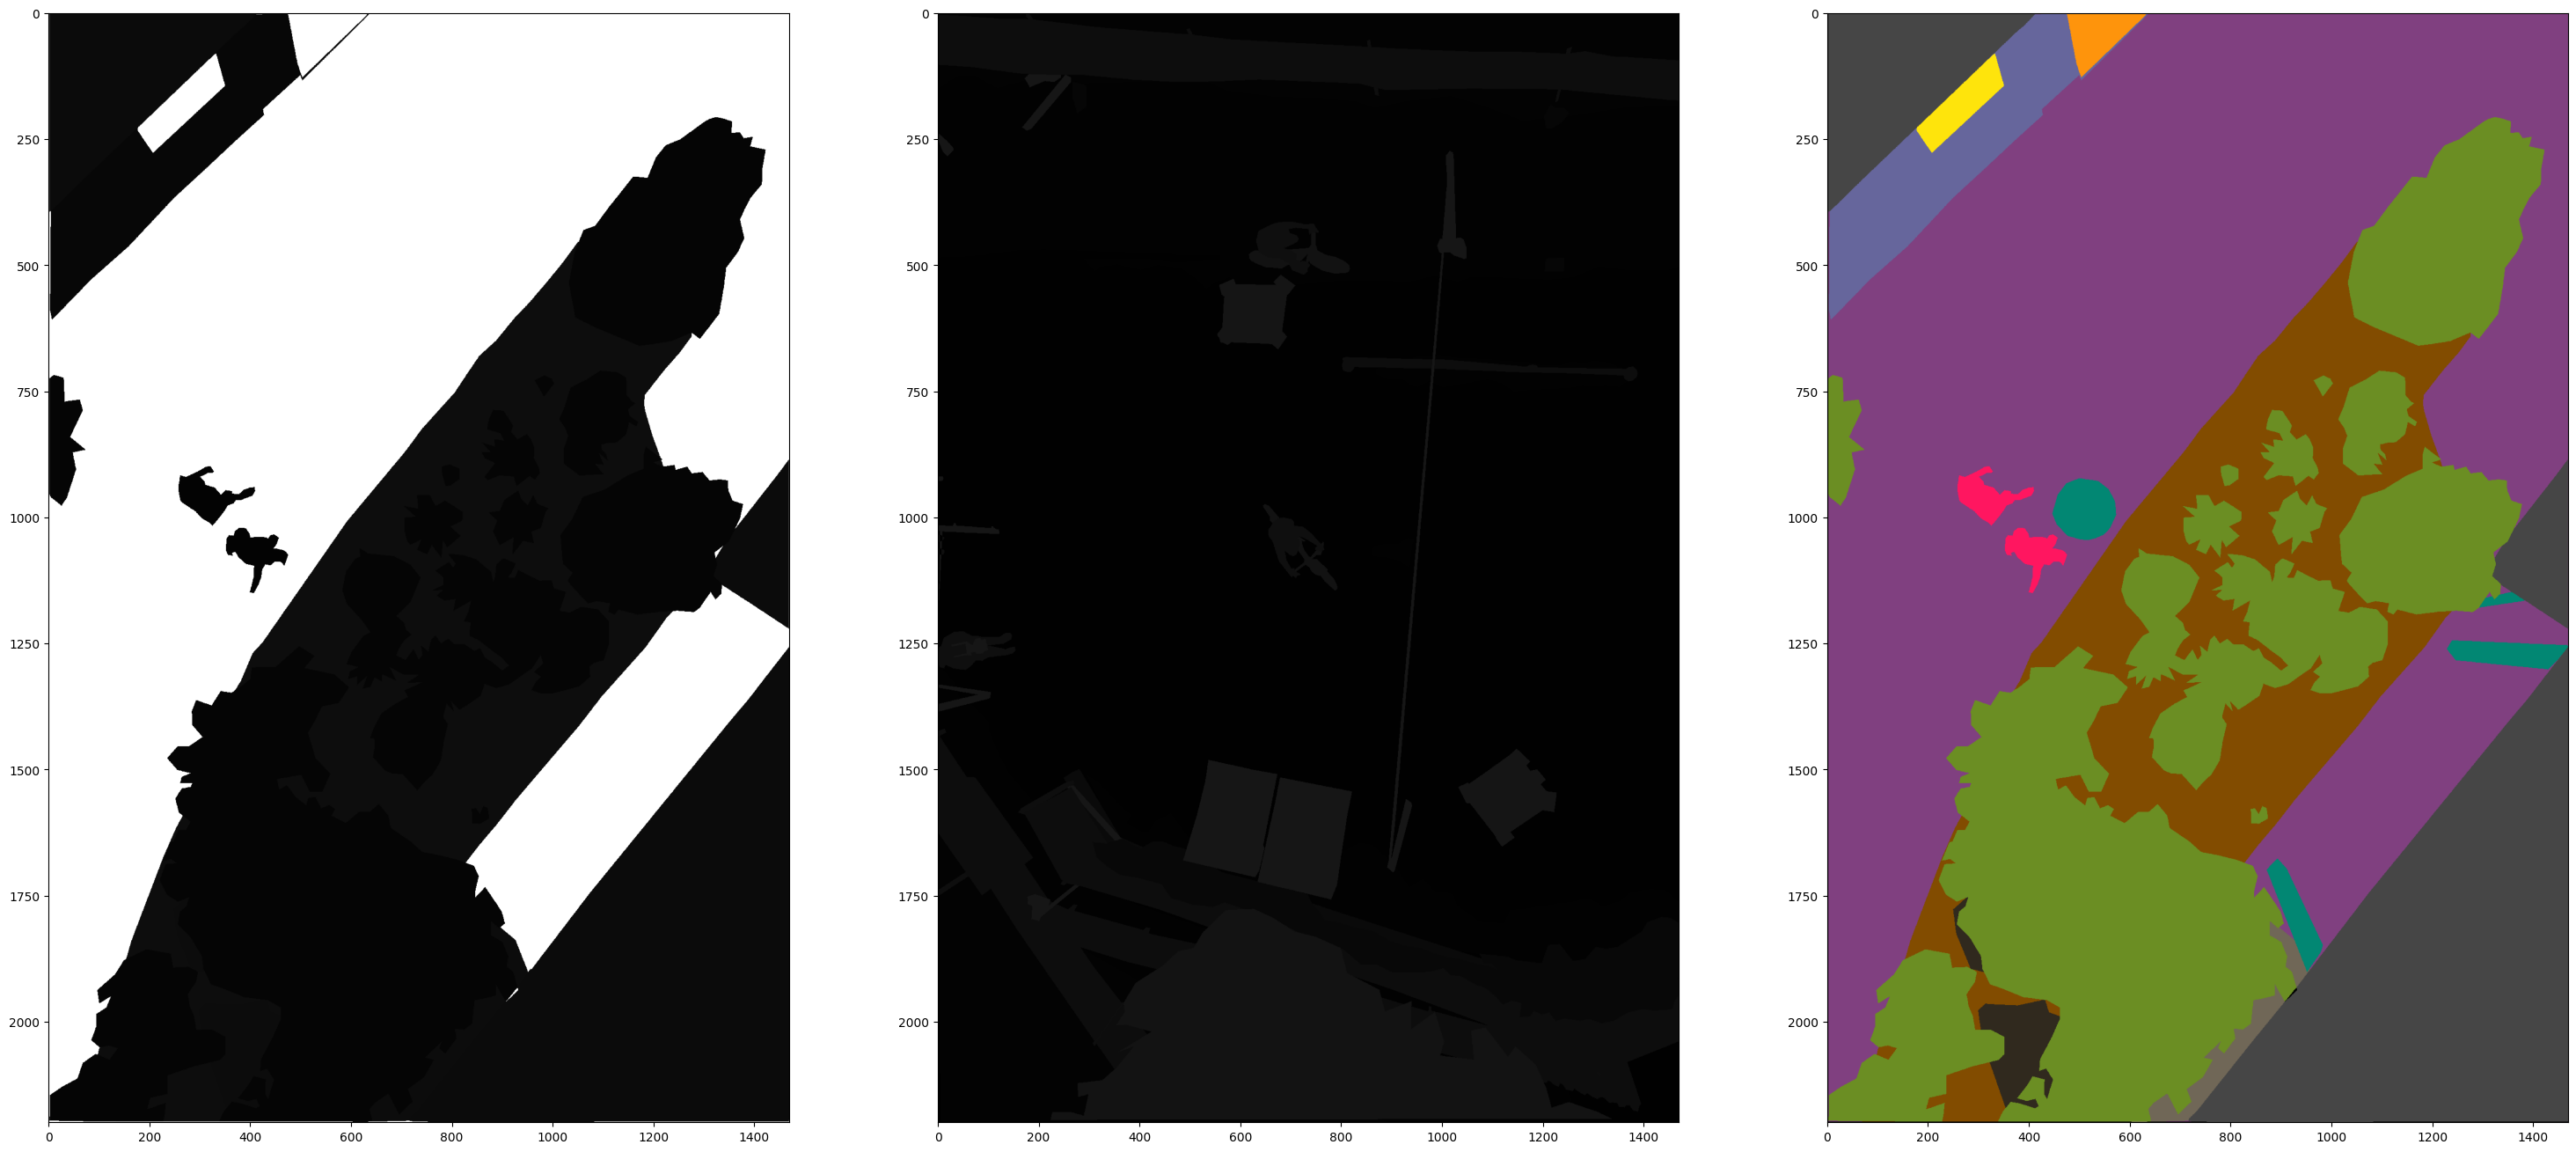

In [ ]:
plt.figure(figsize=(50,50))
# print(np.where(mask==1,1,0).sum())
plt.subplot(1,4,1)
plt.imshow(newmask.astype('uint8'))
plt.subplot(1,4,2)
plt.imshow(msk)
plt.subplot(1,4,3)
plt.imshow(mskc)

In [ ]:
adddata = [ x for x in glob('/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/*') if 'adddata' in x]
other = [ x for x in glob('/content/drive/MyDrive/Colab Notebooks/suadd/semantic_annotations_corrected/*') if 'adddata' not in x]

In [ ]:
len(adddata)

2000

In [ ]:
cv2.imread(adddata[0]).shape

(2200, 1470, 3)

In [ ]:
np.array(Image.open(adddata[0])).shape

(2200, 1470)

In [ ]:
cv2.imread(other[0]).shape

(2200, 1550, 3)

In [ ]:
np.array(Image.open(other[0])).shape

(2200, 1550)

## HUD Dataset

In [6]:
## HUD Dataset: https://hdu-raslab.github.io/

In [8]:
img_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/HDU-Terrain Dataset/*/JPG/*'))
msk_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/HDU-Terrain Dataset/*/RGB/*'))

In [9]:
len(img_path), len(msk_path)

(4007, 4007)

## RUGD dataset

In [10]:
# http://rugd.vision/

In [20]:
img_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/*/*.png'))
msk_path = sorted(glob('/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/*/*.png'))

In [21]:
len(img_path), len(msk_path)

(7436, 7436)

In [22]:
len([x for x in img_path if 'village' in x])

117

In [31]:
y_img = sorted([x for x in img_path if 'village' not in x])
cherrypick_img = [y_img[i] for i in range(0, len(y_img), 7)] + sorted([x for x in img_path if 'village' in x])
y_msk = sorted([x for x in msk_path if 'village' not in x])
cherrypick_msk = [y_msk[i] for i in range(0, len(y_msk), 7)] + sorted([x for x in msk_path if 'village' in x])

len(cherrypick_img), len(cherrypick_msk)

(1163, 1163)

In [37]:
cherrypick_msk[::-1][:5]

['/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/village/village_00583.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/village/village_00578.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/village/village_00573.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/village/village_00568.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_annotations/village/village_00563.png']

In [38]:
cherrypick_img[::-1][:5]

['/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/village/village_00583.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/village/village_00578.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/village/village_00573.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/village/village_00568.png',
 '/content/drive/MyDrive/Colab Notebooks/suadd/RUGD_frames-with-annotations/village/village_00563.png']

In [44]:
labels = [
['void', (0, 0, 0), 255],
['dirt', (108, 64, 20), 13],
['sand', (255, 229, 204), 255],
['grass', (0, 102, 0), 2],
['tree', (0, 255, 0), 5],
['pole', (0, 153, 153), 255],
['water', (0, 128, 255), 0],
['sky', (0, 0, 255), 255],
['vehicle', (255, 255, 0), 255],
['container/generic-object', (255, 0, 127), 255],
['asphalt', (64, 64, 64), 1],
['gravel', (255, 128, 0), 12],
['building', (255, 0, 0), 7],
['mulch', (153, 76, 0), 13],
['rock-bed', (102, 102, 0), 255],
['log', (102, 0, 0), 255],
['bicycle', (0, 255, 128), 255],
['person', (204, 153, 255), 3],
['fence', (102, 0, 204), 255],
['bush', (255, 153, 204), 5],
['sign', (0, 102, 102), 255],
['rock', (153, 204, 255), 255],
['bridge', (102, 255, 255), 255],
['concrete', (101, 101, 11), 10],
['picnic-table', (114, 85, 47), 9],]

In [46]:
for img_p, msk_p in zip(cherrypick_img, cherrypick_msk):

  img = cv2.imread(img_p)
  mskc = cv2.imread(msk_p)
  mskc = cv2.cvtColor(mskc, cv2.COLOR_BGR2RGB)

  img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
  mskc = cv2.rotate(mskc, cv2.ROTATE_90_CLOCKWISE)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, (1470, 2200), interpolation = cv2.INTER_AREA)
  img = np.stack((img,)*3, axis=-1)

  mskc = cv2.resize(mskc, (1470, 2200), interpolation = cv2.INTER_NEAREST)


  newmask = np.ones(mskc.shape)*255
  for l in labels:
#             print(l)
      r1, g1, b1 = l[1]
      r2, g2, b2 = (l[2],l[2],l[2])

      red, green, blue = mskc[:,:,0], mskc[:,:,1], mskc[:,:,2] 

      calichrome = (red == r1) & (green == g1) & (blue == b1)
      newmask[:,:,:3][calichrome] = [r2, g2, b2]


  imgbw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  cv2.imwrite(image_corrected_path + img_p.split('/')[-1].split('.')[0]+'_rugd_1.png', imgbw.astype('uint8'))
  cv2.imwrite(mask_corrected_path  + img_p.split('/')[-1].split('.')[0]+'_rugd_1.png', newmask.astype('uint8')[:,:,0])

In [2]:
import tensorflow as tf

In [3]:
model = tf.keras.applications.ConvNeXtXLarge(
    model_name="convnext_xlarge",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

1401457568/1401457568 [==============================] - 20s 0us/step


In [4]:
model.summary()

Model: "convnext_xlarge"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_xlarge_prestem_normal  (None, 224, 224, 3)  0          ['input_1[0][0]']                
 ization (Normalization)                                                                          
                                                                                                  
 convnext_xlarge_stem (Sequenti  (None, 56, 56, 256)  13056      ['convnext_xlarge_prestem_normali
 al)                                                             zation[0][0]']     

In [6]:
model2 = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    # **kwargs
)

21834768/21834768 [==============================] - 0s 0us/step


In [7]:
model2.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0